# Lab 9 PointCloud Denoising

This lab's task is to perform denoising of a point cloud object. You will generate random points to 'simulate' noisy data on a public dataset. Your task is to classify each node, whether it is a noisy 3D point or not. Follow the comments provided in the notebook and make sure to understand the provided functions which will help you in building the pipeline.

1. Make a copy of this notebook.
2. Fill in the codes to create a Graph Convolutional Network to perform the denoising task where '# ADD YOUR CODE HERE' is mentioned. 
3. Attach a report at the end of the notebook with the following data:
    - Provide the accuracy under different K = 3, 6, 9 in a table. K is the hyperparameter in KNN edge information builder for the graph convolution layer.
    - Report a snapshot of the final epoch for each K.
4. Submit only the **link** to your notebook. Change the permission to **anyone with the link at UofA can edit the notebook.**  

Hint: Your model should give > 70% accuracy

Your Name:  Chenlin Cao
CCID: chenlin
<br>
References:
1. Lecture slides and notes
2. https://pytorch.org/docs/stable/index.html
3. https://pytorch-geometric.readthedocs.io/en/latest/
4. https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
5. https://towardsdatascience.com/introduction-to-message-passing-neural-networks-e670dc103a87 


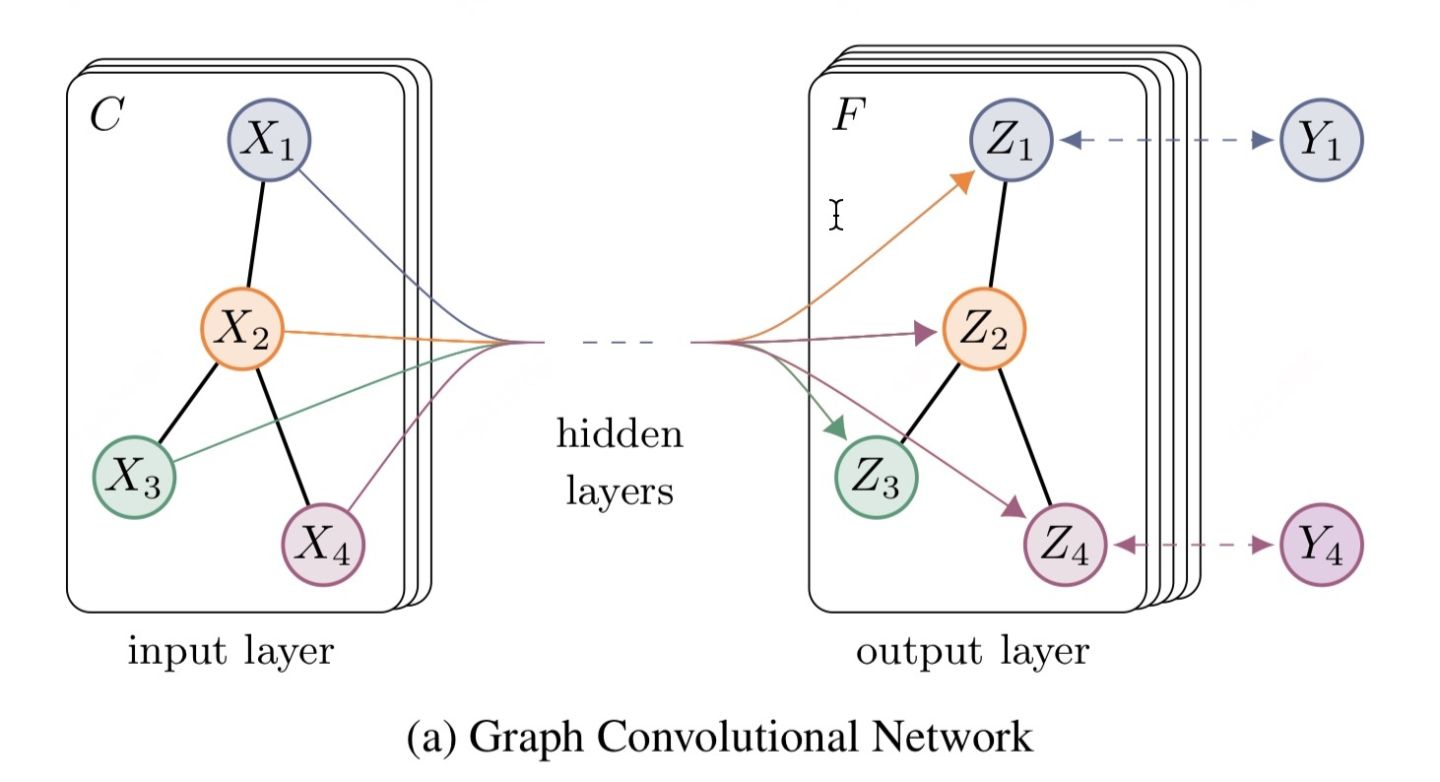
Figure credit -->  Kipf, Thomas N., and Max Welling. “Semi-supervised classification with graph convolutional networks.” arXiv preprint arXiv:1609.02907 (2016).

In [ ]:

# mount google drive to save the dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# install pytorch-geometric 
!pip install torch
#import torch; 
#print(torch.__version__)
#print(torch.version.cuda)
import os
os.environ['TORCH'] ='1.8.0'
os.environ['CUDA'] ='cu101'

!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-${TORCH}+${CUDA}.html
!pip install torch-geometric
!pip install torchvision
!pip install ipdb


Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html


In [ ]:

import os.path as osp
import shutil

import torch
import torch.nn.functional as F
import torch_geometric.transforms as T

from torch_geometric.datasets import ShapeNet
from torch_geometric.data import DataLoader
from torchvision import transforms
from torch_geometric.nn import GCNConv
from easydict import EasyDict as edict
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np
import time
import random
import ipdb #You can use this to debug your code


Training step ...
     Batch idx 0/19, loss:0.6905
     Batch idx 5/19, loss:0.6498
     Batch idx 10/19, loss:0.5907
     Batch idx 15/19, loss:0.5350
Testing step ...
     Batch idx 0/3, Accuracy:77.1116
     Total accuracy:76.4870


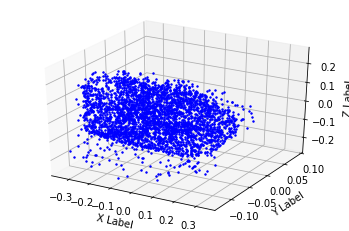

Epoch: 001, Train loss: 11.4710, Test Accuracy: 76.4870, Duration: 45.77
Training step ...
     Batch idx 0/19, loss:0.5143
     Batch idx 5/19, loss:0.5099
     Batch idx 10/19, loss:0.4800
     Batch idx 15/19, loss:0.5073
Testing step ...
     Batch idx 0/3, Accuracy:76.8151
     Total accuracy:76.4016


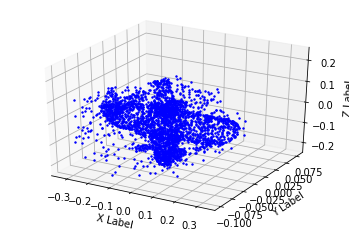

Epoch: 002, Train loss: 9.4857, Test Accuracy: 76.4016, Duration: 43.01
Training step ...
     Batch idx 0/19, loss:0.5016
     Batch idx 5/19, loss:0.4942
     Batch idx 10/19, loss:0.4725
     Batch idx 15/19, loss:0.5081
Testing step ...
     Batch idx 0/3, Accuracy:77.0845
     Total accuracy:76.6564


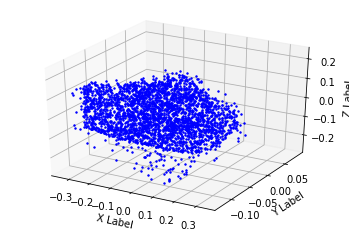

Epoch: 003, Train loss: 9.2639, Test Accuracy: 76.6564, Duration: 44.55
Training step ...
     Batch idx 0/19, loss:0.4732
     Batch idx 5/19, loss:0.4863
     Batch idx 10/19, loss:0.4670
     Batch idx 15/19, loss:0.4784
Testing step ...
     Batch idx 0/3, Accuracy:77.7204
     Total accuracy:77.2001


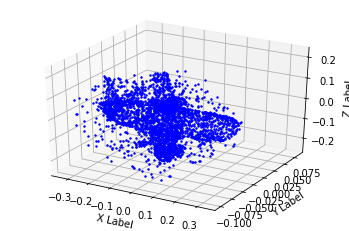

Epoch: 004, Train loss: 9.1558, Test Accuracy: 77.2001, Duration: 43.56
Training step ...
     Batch idx 0/19, loss:0.4629
     Batch idx 5/19, loss:0.4708
     Batch idx 10/19, loss:0.4710
     Batch idx 15/19, loss:0.4828
Testing step ...
     Batch idx 0/3, Accuracy:78.0631
     Total accuracy:77.5768


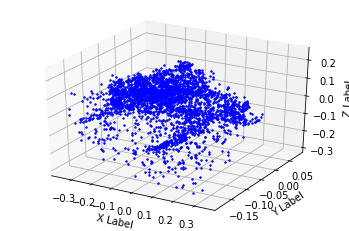

Epoch: 005, Train loss: 9.0853, Test Accuracy: 77.5768, Duration: 46.16
Training step ...
     Batch idx 0/19, loss:0.4632
     Batch idx 5/19, loss:0.4680
     Batch idx 10/19, loss:0.4574
     Batch idx 15/19, loss:0.4793
Testing step ...
     Batch idx 0/3, Accuracy:78.2388
     Total accuracy:77.7154


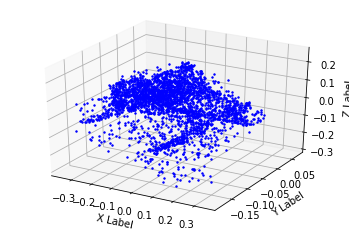

Epoch: 006, Train loss: 9.0199, Test Accuracy: 77.7154, Duration: 46.03
Training step ...
     Batch idx 0/19, loss:0.4616
     Batch idx 5/19, loss:0.4697
     Batch idx 10/19, loss:0.4808
     Batch idx 15/19, loss:0.4658
Testing step ...
     Batch idx 0/3, Accuracy:78.5480
     Total accuracy:77.9032


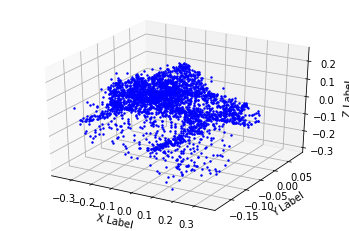

Epoch: 007, Train loss: 8.9665, Test Accuracy: 77.9032, Duration: 45.48
Training step ...
     Batch idx 0/19, loss:0.4831
     Batch idx 5/19, loss:0.4674
     Batch idx 10/19, loss:0.4544
     Batch idx 15/19, loss:0.4647
Testing step ...
     Batch idx 0/3, Accuracy:78.3423
     Total accuracy:77.8624


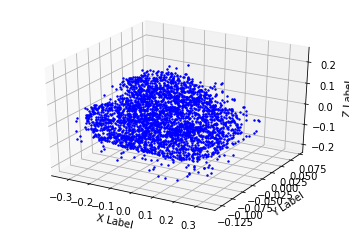

Epoch: 008, Train loss: 8.9318, Test Accuracy: 77.8624, Duration: 45.15
Training step ...
     Batch idx 0/19, loss:0.4490
     Batch idx 5/19, loss:0.4628
     Batch idx 10/19, loss:0.4901
     Batch idx 15/19, loss:0.4572
Testing step ...
     Batch idx 0/3, Accuracy:78.6150
     Total accuracy:78.1006


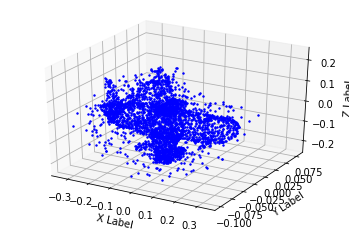

Epoch: 009, Train loss: 8.8951, Test Accuracy: 78.1006, Duration: 43.74
Training step ...
     Batch idx 0/19, loss:0.4503
     Batch idx 5/19, loss:0.4491
     Batch idx 10/19, loss:0.4969
     Batch idx 15/19, loss:0.4578
Testing step ...
     Batch idx 0/3, Accuracy:78.4355
     Total accuracy:77.9315


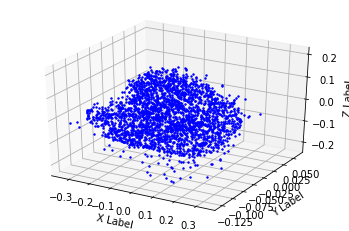

Epoch: 010, Train loss: 8.8215, Test Accuracy: 77.9315, Duration: 45.42
Training step ...
     Batch idx 0/19, loss:0.4541
     Batch idx 5/19, loss:0.4768
     Batch idx 10/19, loss:0.4781
     Batch idx 15/19, loss:0.4740
Testing step ...
     Batch idx 0/3, Accuracy:78.7697
     Total accuracy:78.1826


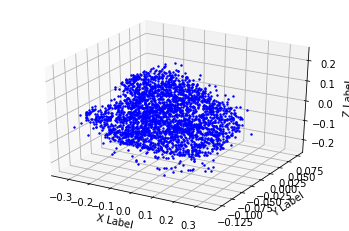

Epoch: 011, Train loss: 8.7967, Test Accuracy: 78.1826, Duration: 44.80
Training step ...
     Batch idx 0/19, loss:0.4685
     Batch idx 5/19, loss:0.4617
     Batch idx 10/19, loss:0.4598
     Batch idx 15/19, loss:0.4670
Testing step ...
     Batch idx 0/3, Accuracy:78.7280
     Total accuracy:78.2564


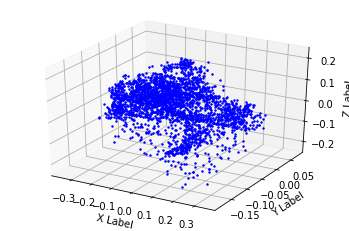

Epoch: 012, Train loss: 8.7764, Test Accuracy: 78.2564, Duration: 45.21
Training step ...
     Batch idx 0/19, loss:0.4618
     Batch idx 5/19, loss:0.4518
     Batch idx 10/19, loss:0.4574
     Batch idx 15/19, loss:0.4757
Testing step ...
     Batch idx 0/3, Accuracy:78.8099
     Total accuracy:78.2315


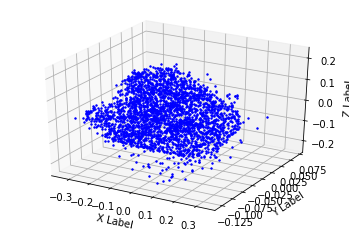

Epoch: 013, Train loss: 8.7707, Test Accuracy: 78.2315, Duration: 44.31
Training step ...
     Batch idx 0/19, loss:0.4505
     Batch idx 5/19, loss:0.4475
     Batch idx 10/19, loss:0.4515
     Batch idx 15/19, loss:0.4739
Testing step ...
     Batch idx 0/3, Accuracy:78.7812
     Total accuracy:78.3107


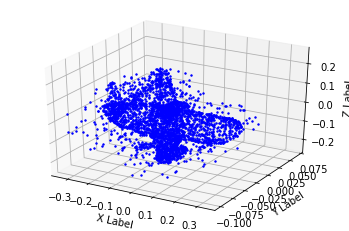

Epoch: 014, Train loss: 8.7729, Test Accuracy: 78.3107, Duration: 43.58
Training step ...
     Batch idx 0/19, loss:0.4795
     Batch idx 5/19, loss:0.4566
     Batch idx 10/19, loss:0.4569
     Batch idx 15/19, loss:0.4957
Testing step ...
     Batch idx 0/3, Accuracy:78.7680
     Total accuracy:78.2313


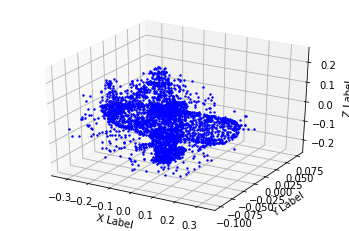

Epoch: 015, Train loss: 8.7678, Test Accuracy: 78.2313, Duration: 43.93
Training step ...
     Batch idx 0/19, loss:0.4535
     Batch idx 5/19, loss:0.4570
     Batch idx 10/19, loss:0.4695
     Batch idx 15/19, loss:0.4675
Testing step ...
     Batch idx 0/3, Accuracy:78.7891
     Total accuracy:78.2665


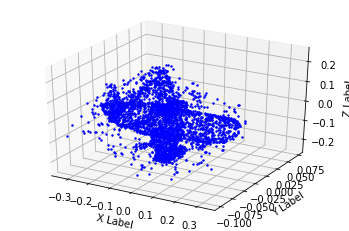

Epoch: 016, Train loss: 8.7634, Test Accuracy: 78.2665, Duration: 43.33
Training step ...
     Batch idx 0/19, loss:0.4544
     Batch idx 5/19, loss:0.4566
     Batch idx 10/19, loss:0.4546
     Batch idx 15/19, loss:0.4803
Testing step ...
     Batch idx 0/3, Accuracy:78.7783
     Total accuracy:78.2440


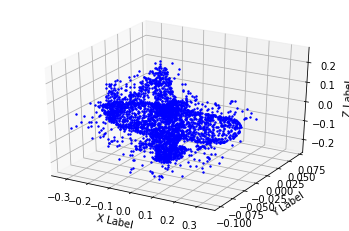

Epoch: 017, Train loss: 8.7599, Test Accuracy: 78.2440, Duration: 43.91
Training step ...
     Batch idx 0/19, loss:0.4744
     Batch idx 5/19, loss:0.4711
     Batch idx 10/19, loss:0.4637
     Batch idx 15/19, loss:0.4540
Testing step ...
     Batch idx 0/3, Accuracy:78.8726
     Total accuracy:78.3561


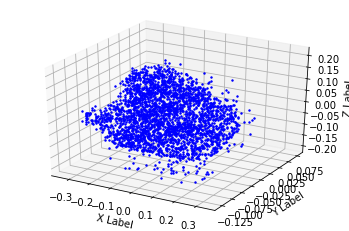

Epoch: 018, Train loss: 8.7601, Test Accuracy: 78.3561, Duration: 44.10
Training step ...
     Batch idx 0/19, loss:0.4750
     Batch idx 5/19, loss:0.4733
     Batch idx 10/19, loss:0.4428
     Batch idx 15/19, loss:0.4600
Testing step ...
     Batch idx 0/3, Accuracy:78.7858
     Total accuracy:78.3255


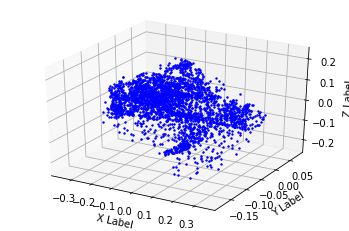

Epoch: 019, Train loss: 8.7585, Test Accuracy: 78.3255, Duration: 45.03
Training step ...
     Batch idx 0/19, loss:0.4627
     Batch idx 5/19, loss:0.4434
     Batch idx 10/19, loss:0.4811
     Batch idx 15/19, loss:0.4788
Testing step ...
     Batch idx 0/3, Accuracy:78.8093
     Total accuracy:78.3265


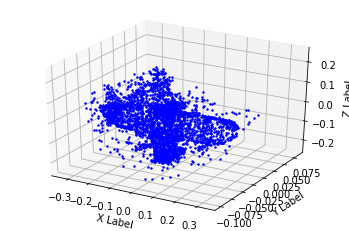

Epoch: 020, Train loss: 8.7541, Test Accuracy: 78.3265, Duration: 43.37
Training step ...
     Batch idx 0/19, loss:0.4549
     Batch idx 5/19, loss:0.4564
     Batch idx 10/19, loss:0.4685
     Batch idx 15/19, loss:0.4612
Testing step ...
     Batch idx 0/3, Accuracy:78.7619
     Total accuracy:78.3198


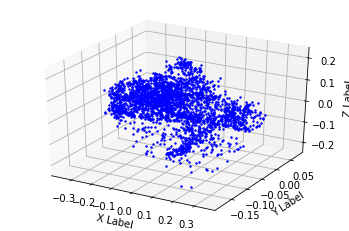

Epoch: 021, Train loss: 8.7479, Test Accuracy: 78.3198, Duration: 44.29
Training step ...
     Batch idx 0/19, loss:0.4637
     Batch idx 5/19, loss:0.4651
     Batch idx 10/19, loss:0.4667
     Batch idx 15/19, loss:0.4402
Testing step ...
     Batch idx 0/3, Accuracy:78.7775
     Total accuracy:78.2835


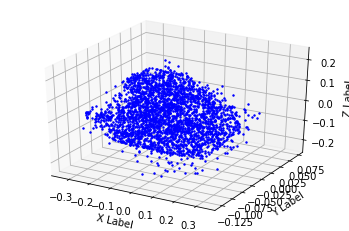

Epoch: 022, Train loss: 8.7510, Test Accuracy: 78.2835, Duration: 43.98
Training step ...
     Batch idx 0/19, loss:0.4844
     Batch idx 5/19, loss:0.4856
     Batch idx 10/19, loss:0.4536
     Batch idx 15/19, loss:0.4466
Testing step ...
     Batch idx 0/3, Accuracy:78.7555
     Total accuracy:78.3478


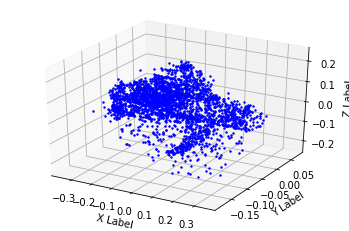

Epoch: 023, Train loss: 8.7519, Test Accuracy: 78.3478, Duration: 44.17
Training step ...
     Batch idx 0/19, loss:0.4459
     Batch idx 5/19, loss:0.4524
     Batch idx 10/19, loss:0.4488
     Batch idx 15/19, loss:0.4727
Testing step ...
     Batch idx 0/3, Accuracy:78.7695
     Total accuracy:78.3326


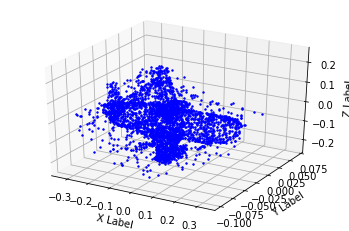

Epoch: 024, Train loss: 8.7520, Test Accuracy: 78.3326, Duration: 43.31
Training step ...
     Batch idx 0/19, loss:0.4772
     Batch idx 5/19, loss:0.4394
     Batch idx 10/19, loss:0.4565
     Batch idx 15/19, loss:0.4272
Testing step ...
     Batch idx 0/3, Accuracy:78.7048
     Total accuracy:78.3077


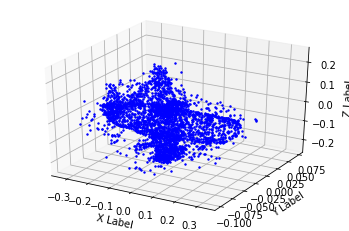

Epoch: 025, Train loss: 8.7535, Test Accuracy: 78.3077, Duration: 43.20
Training step ...
     Batch idx 0/19, loss:0.4700
     Batch idx 5/19, loss:0.4709
     Batch idx 10/19, loss:0.4482
     Batch idx 15/19, loss:0.4717
Testing step ...
     Batch idx 0/3, Accuracy:78.8891
     Total accuracy:78.3460


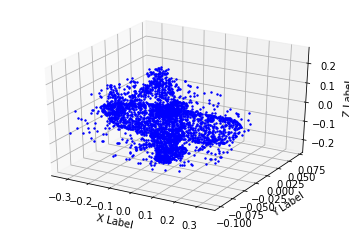

Epoch: 026, Train loss: 8.7509, Test Accuracy: 78.3460, Duration: 43.54
Training step ...
     Batch idx 0/19, loss:0.4631
     Batch idx 5/19, loss:0.4594
     Batch idx 10/19, loss:0.4696
     Batch idx 15/19, loss:0.4660
Testing step ...
     Batch idx 0/3, Accuracy:78.7338
     Total accuracy:78.3013


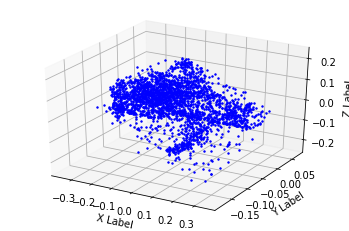

Epoch: 027, Train loss: 8.7579, Test Accuracy: 78.3013, Duration: 44.15
Training step ...
     Batch idx 0/19, loss:0.4747
     Batch idx 5/19, loss:0.4625
     Batch idx 10/19, loss:0.4570
     Batch idx 15/19, loss:0.4636
Testing step ...
     Batch idx 0/3, Accuracy:78.8375
     Total accuracy:78.3550


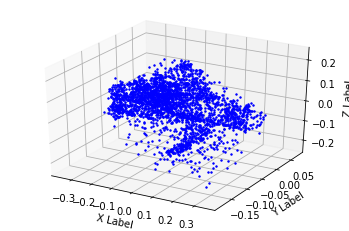

Epoch: 028, Train loss: 8.7464, Test Accuracy: 78.3550, Duration: 44.38
Training step ...
     Batch idx 0/19, loss:0.4445
     Batch idx 5/19, loss:0.4697
     Batch idx 10/19, loss:0.4659
     Batch idx 15/19, loss:0.4612
Testing step ...
     Batch idx 0/3, Accuracy:78.8414
     Total accuracy:78.2805


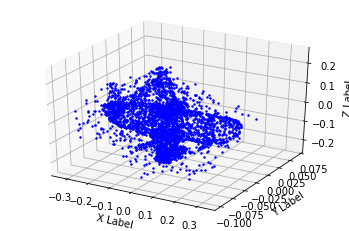

Epoch: 029, Train loss: 8.7463, Test Accuracy: 78.2805, Duration: 43.41
Training step ...
     Batch idx 0/19, loss:0.4571
     Batch idx 5/19, loss:0.4372
     Batch idx 10/19, loss:0.4803
     Batch idx 15/19, loss:0.4556
Testing step ...
     Batch idx 0/3, Accuracy:78.8913
     Total accuracy:78.3824


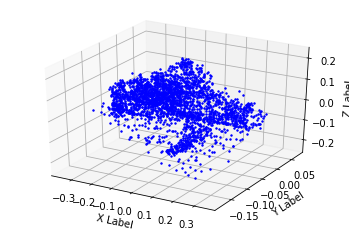

Epoch: 030, Train loss: 8.7445, Test Accuracy: 78.3824, Duration: 43.91
Training step ...
     Batch idx 0/19, loss:0.4502
     Batch idx 5/19, loss:0.4482
     Batch idx 10/19, loss:0.4410
     Batch idx 15/19, loss:0.4647
Testing step ...
     Batch idx 0/3, Accuracy:78.7965
     Total accuracy:78.3401


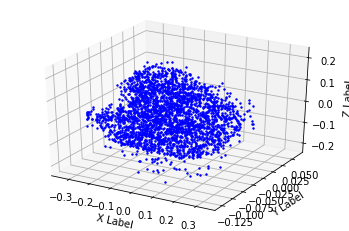

Epoch: 031, Train loss: 8.7525, Test Accuracy: 78.3401, Duration: 43.31
Training step ...
     Batch idx 0/19, loss:0.4533
     Batch idx 5/19, loss:0.4335
     Batch idx 10/19, loss:0.4693
     Batch idx 15/19, loss:0.4405
Testing step ...
     Batch idx 0/3, Accuracy:78.7810
     Total accuracy:78.3337


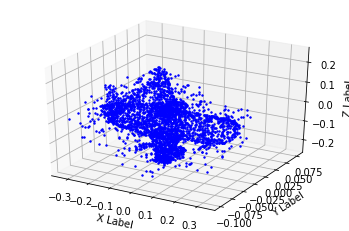

Epoch: 032, Train loss: 8.7462, Test Accuracy: 78.3337, Duration: 43.34
Training step ...
     Batch idx 0/19, loss:0.4671
     Batch idx 5/19, loss:0.4331
     Batch idx 10/19, loss:0.4390
     Batch idx 15/19, loss:0.4689
Testing step ...
     Batch idx 0/3, Accuracy:78.8507
     Total accuracy:78.3606


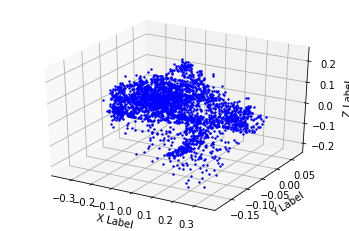

Epoch: 033, Train loss: 8.7489, Test Accuracy: 78.3606, Duration: 44.10
Training step ...
     Batch idx 0/19, loss:0.4546
     Batch idx 5/19, loss:0.4589
     Batch idx 10/19, loss:0.4550
     Batch idx 15/19, loss:0.4409
Testing step ...
     Batch idx 0/3, Accuracy:78.8783
     Total accuracy:78.4349


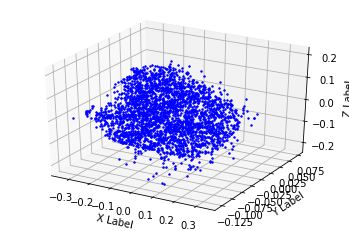

Epoch: 034, Train loss: 8.7502, Test Accuracy: 78.4349, Duration: 43.35
Training step ...
     Batch idx 0/19, loss:0.4526
     Batch idx 5/19, loss:0.4890
     Batch idx 10/19, loss:0.4534
     Batch idx 15/19, loss:0.4674
Testing step ...
     Batch idx 0/3, Accuracy:78.7817
     Total accuracy:78.3336


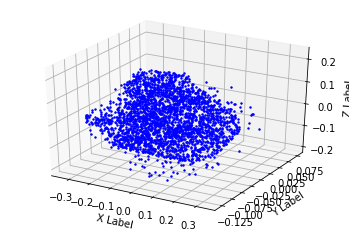

Epoch: 035, Train loss: 8.7462, Test Accuracy: 78.3336, Duration: 43.61
Training step ...
     Batch idx 0/19, loss:0.4724
     Batch idx 5/19, loss:0.4749
     Batch idx 10/19, loss:0.4411
     Batch idx 15/19, loss:0.4677
Testing step ...
     Batch idx 0/3, Accuracy:78.8369
     Total accuracy:78.3768


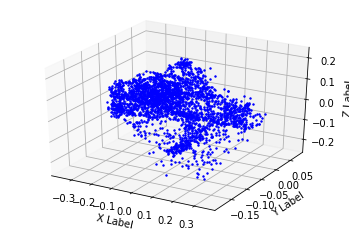

Epoch: 036, Train loss: 8.7466, Test Accuracy: 78.3768, Duration: 44.20
Training step ...
     Batch idx 0/19, loss:0.4450
     Batch idx 5/19, loss:0.4526
     Batch idx 10/19, loss:0.4545
     Batch idx 15/19, loss:0.4836
Testing step ...
     Batch idx 0/3, Accuracy:78.8309
     Total accuracy:78.3513


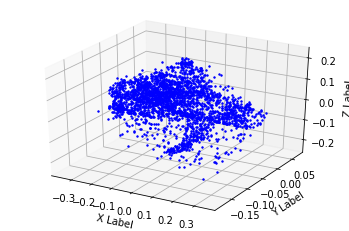

Epoch: 037, Train loss: 8.7459, Test Accuracy: 78.3513, Duration: 44.30
Training step ...
     Batch idx 0/19, loss:0.4658
     Batch idx 5/19, loss:0.4568
     Batch idx 10/19, loss:0.4439
     Batch idx 15/19, loss:0.4626
Testing step ...
     Batch idx 0/3, Accuracy:78.7916
     Total accuracy:78.3341


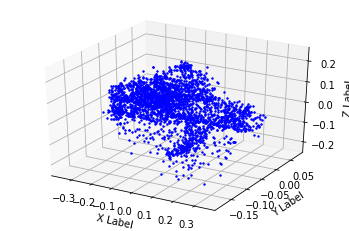

Epoch: 038, Train loss: 8.7491, Test Accuracy: 78.3341, Duration: 44.57
Training step ...
     Batch idx 0/19, loss:0.4592
     Batch idx 5/19, loss:0.4343
     Batch idx 10/19, loss:0.4617
     Batch idx 15/19, loss:0.4568
Testing step ...
     Batch idx 0/3, Accuracy:78.7850
     Total accuracy:78.3590


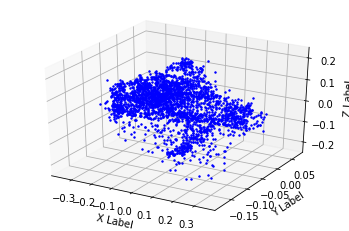

Epoch: 039, Train loss: 8.7424, Test Accuracy: 78.3590, Duration: 44.30
Training step ...
     Batch idx 0/19, loss:0.4574
     Batch idx 5/19, loss:0.4313
     Batch idx 10/19, loss:0.4618
     Batch idx 15/19, loss:0.4627
Testing step ...
     Batch idx 0/3, Accuracy:78.7887
     Total accuracy:78.3164


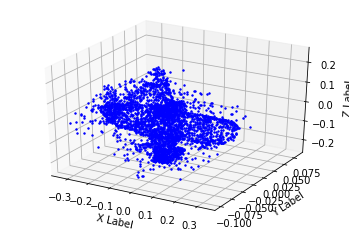

Epoch: 040, Train loss: 8.7467, Test Accuracy: 78.3164, Duration: 43.16


In [ ]:

# https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.ShapeNet
args = edict({
    # Fixed args DO NOT CHANGE
    "categories": "Airplane",  # fixed
    "epochs": 40,  # fixed
    "totalN":5000,  # fixed
    # Tunable args
    "batchsz":103,  # tunable
    "decaystep":10, # tunable
    "decayfactor":0.1, # tunable
    "lr":0.1,  # tunable
    "ploteveryNepoch":1,
    # Try different k in KNNgraph
    "k": 9,  # try 3 6 9
})


class Net(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Net, self).__init__()
        # ADD YOUR CODE HERE
        # Create two layers of graph convolutional network. Apply relu after the 1st layer.
        # We encourage to experiment with different network architectures.
        # https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        self.conv1 = GCNConv(in_channels, 8)
        self.conv2 = GCNConv(8, out_channels)
        

    def forward(self, x, edge_index):
      # ADD YOUR CODE HERE
      x = self.conv1(x, edge_index)
      x = x.relu()
      x = self.conv2(x, edge_index)
      
      return x

class generateNoise(object):

  def __init__(self,N):
    self.N = N

  def __call__(self,sample):
    # ADD YOUR CODE HERE 
    # Generate random X points so that total number for each sample in the batch is N. 
    # For each sample, the random points should be in the [minimum,maximum] interval per each axis.
    # print(f'sample.pos: {sample.pos}:')
    (min_x, min_y, min_z), min_indicies = torch.min(sample.pos, 0)
    (max_x, max_y, max_z), max_indicies = torch.max(sample.pos, 0)
    # print(f'min_x: {min_x}:')
    # print(f'min_y: {min_y}:')
    # print(f'min_z: {min_z}:')
    # print(f'max_x: {max_x}:')
    # print(f'max_y: {max_y}:')
    # print(f'max_z: {max_z}:')

    # Generate random points
    # X random values for X axis
    sample_size = sample.y.size()[0]
    X = self.N - sample_size
    # print(f'self.N: {self.N}')
    # print(f'sample.y.size()[0]: {sample.y.size()[0]}')
    # print(f'X: {X}')
    x_axis = (max_x - min_x) * torch.rand(X, 1) + min_x
    y_axis = (max_y - min_y) * torch.rand(X, 1) + min_y
    z_axis = (max_z - min_z) * torch.rand(X, 1) + min_z
    noise = torch.cat((x_axis, y_axis, z_axis), dim = 1)
    # original points label: 0
    # noisy points label: 1
    clean_labels = torch.ones(sample_size)
    noise_labels = torch.zeros(X)
    # print(f'noise.size(): {noise.size()}:')
    # print(f'sample.pos.size(): {sample.pos.size()}:')
    # append noise to the sample
    if noise.size()[1] == sample.pos.size()[1]:
      sample.pos = torch.cat((sample.pos, noise), dim = 0)
      # print(f'updated sample.pos.size(): {sample.pos.size()}:')
      sample.y = torch.cat((clean_labels, noise_labels))
    else:
      pass

    return sample


def plot_sample(x,y):
  # This function plots 3D points in X with label=1 in y

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  for a,lbl in zip(x,y):
    if lbl == 1:
      ax.scatter(a[0], a[1], a[2], s=2,c="b")

  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')

  plt.show()

def train(model, optimizer, train_loader, device):
  model.train()
  total_loss = 0
  N = len(train_loader)

  for batchidx, data in enumerate(train_loader):
      # print(data)
      optimizer.zero_grad()
      x = data.pos.to(device)
      edge_index = data.edge_index.to(device)
      # ADD YOUR CODE HERE
      ### Apply the model and provide the suitable arguments.
      ### Create binary cross entropy loss, check documentation for binary_cross_entropy_with_logits
      labels = data.y.to(device)

      out = model(x, edge_index) 
      criterion = torch.nn.BCEWithLogitsLoss() 
      loss = criterion(out.squeeze(), labels.squeeze())
      ##
      total_loss += loss.item()
      loss.backward()
      optimizer.step()

      if batchidx % 5==0:
        print('     Batch idx %d/%d, loss:%.4f'%(batchidx,N,loss.item()))
        

  return total_loss

def binarize_logits(out):
  return (torch.sigmoid(out.squeeze()) >= 0.5).float()

def test(model, test_loader, device, draw=False):
  model.eval()

  correct = 0
  total_nodes = 0
  N = len(test_loader)

  for batchidx, data in enumerate(test_loader):
      data = data.to(device)
      x = data.pos.to(device)
      edge_index = data.edge_index.to(device)
      
      # ADD YOUR CODE HERE
      # Apply model on test data
      # Calculate accuracy, check provided binarize_logits function
      labels = data.y.to(device)
      out = model(x, edge_index)
      pred = binarize_logits(out)
      test_correct = pred.squeeze() == labels.squeeze()
      correct +=  test_correct.sum()

      ##
      total_nodes += out.shape[0]

      if batchidx % 5 == 0:
        print('     Batch idx %d/%d, Accuracy:%.4f'%(batchidx,N,(correct / total_nodes)*100))

  test_acc = (correct / total_nodes)*100
  print('     Total accuracy:%.4f'%(test_acc))
  
  if draw:
    # ADD YOUR CODE HERE
    # This part should sample a random batch from the test dataset. 
    # Note: Use plot_sample and binarize_logits functions for plotting and label transformation.
    # Hint: Make sure to plot only one sample from the batch (the first N pos points)
    
    # get a random batch by iterating the test_loader a random number of times
    iterator = iter(test_loader)
    for i in range(random.randint(1, 3)):
      batch = iterator.next()
    # print(f'batch: {batch}:')
    # print(f'type(batch): {type(batch)}:')

    # get the first sample
    # batchidx, category, edge_index, pos, y = batch
    # print(f'batch.pos: {batch.pos}:')
    x = batch.pos[0:args.totalN, :]
    # print(f'x: {x}:')
    # print(f'batch.edge_index: {batch.edge_index}:')
    edge_index = batch.edge_index[:, 0:args.totalN * args.k]
    # print(f'edge_index: {edge_index}:')

    out = model(x.to(device), edge_index.to(device)).cpu()
    plot_sample(x, binarize_logits(out))

    # print("draw completes")

  return test_acc

def get_dataset():

  path = osp.join('drive/My Drive/data', 'ShapeNet')  # Download dataset to your google drive /data/ShapeNet
  # Transform is applied each time a new batch is processed in the train/test step.
  # Notice how generateNoise is applied first then a KNNGraph to create edge information of the raw datapoints for each sample.
  train_data = ShapeNet(path, args.categories, 
                           transform = transforms.Compose([generateNoise(args.totalN),T.KNNGraph(k=args.k)]),
                           split='train',include_normals=False)  
  test_data = ShapeNet(path, args.categories, 
                           transform = transforms.Compose([generateNoise(args.totalN),T.KNNGraph(k=args.k)]),
                           split='test',include_normals=False)  
 
  return train_data, test_data

def main():
  
  # print("Main starts ...")
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Get the ShapeNet dataset and split into train and test portions
  train_dataset, test_dataset = get_dataset()

  # # Get the dim info about the ShapeNet dataset
  # print()
  # print(f'Dataset: {train_dataset}:')
  # print('======================')
  # print(f'Number of graphs: {len(train_dataset)}')

  # print("test")

  # Convert train and test to dataloader for batch processing
  train_loader = DataLoader(train_dataset, args.batchsz, shuffle=True, drop_last = True)
  test_loader = DataLoader(test_dataset, args.batchsz, shuffle=False, drop_last = True)
  
  # Create the graphical network architecture defined in Net class.
  model = Net(3, 1)
  model = model.to(device)
  
  # Create optimizer object to update the model's parameters.
  optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

  # Training loop. It usually consists of N epochs and each epoch perform a full training step and a full testing step.
  for epoch in range(1, args.epochs + 1):
    
    t_start = time.perf_counter()
    print('Training step ...')
    train_loss = train(model, optimizer, train_loader, device)
    print('Testing step ...')
    test_acc = test(model, test_loader, device, epoch % args.ploteveryNepoch == 0)
    t_end = time.perf_counter()

    print('Epoch: {:03d}, Train loss: {:.4f}, Test Accuracy: {:.4f}, Duration: {:.2f}'.format(
          epoch, train_loss, test_acc, t_end - t_start))
    
    # Decay the lr each deacystep by a factor of deacyfactor. These are defined in args dictionary and you can playaround to achieve best results.
    if epoch % args.decaystep == 0:
      for param_group in optimizer.param_groups:
        param_group['lr'] = args.decayfactor * param_group['lr']

main()

**MY REPORT HERE**

**Test Accuracy Table:**<br>
k = 3 Accuracy: 78.9450<br>
k = 6 Accuracy: 80.2339<br>
k = 9 Accuracy: 78.3164<br>

***Final Epoch for k = 3:**

Training step ...<br>
     &emsp;Batch idx 0/19, loss:0.4345<br>
     &emsp;Batch idx 5/19, loss:0.4353<br>
     &emsp;Batch idx 10/19, loss:0.4547<br>
     &emsp;Batch idx 15/19, loss:0.4468<br>
Testing step ...<br>
     &emsp;Batch idx 0/3, Accuracy:79.2812<br>
     &emsp;Total accuracy:78.9450<br>

**Epoch: 040, Train loss: 8.5184, Test Accuracy: 78.9450, Duration: 29.36**

***Final Epoch for k = 6:**

Training step ...<br>
     &emsp;Batch idx 0/19, loss:0.4298<br>
     &emsp;Batch idx 5/19, loss:0.4646<br>
     &emsp;Batch idx 10/19, loss:0.4511<br>
     &emsp;Batch idx 15/19, loss:0.4341<br>
Testing step ...<br>
     &emsp;Batch idx 0/3, Accuracy:80<br>
     &emsp;Total accuracy:80.2339<br>

**Epoch: 040, Train loss: 8.3082, Test Accuracy: 80.2339, Duration: 37.18**

***Final Epoch for k = 9:**

Training step ...<br>
     &emsp;Batch idx 0/19, loss:0.4574<br>
     &emsp;Batch idx 5/19, loss:0.4313<br>
     &emsp;Batch idx 10/19, loss:0.4618<br>
     &emsp;Batch idx 15/19, loss:0.4627<br>
Testing step ...<br>
     &emsp;Batch idx 0/3, Accuracy:78.7887<br>
     &emsp;Total accuracy:78.3164<br>

**Epoch: 040, Train loss: 8.7467, Test Accuracy: 78.3164, Duration: 43.16**